# Fuga de personal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# BUSINESS ANALYTICS

In [3]:
df.info() # EMPEZAMOS CON EL ANALISIS DEL DATASET
#revisaremos las variables del dataset para responder las preguntas y obtenr el analisis y una salida

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# ANALISIS DE NULOS

* para asegurar la calidad de los datos buscaremos los datos nulos y datos erroneos o datos atipicos como edades centenales.

 * detetctar nulos  si detectamos una variable con mas del 70% nulo esa variable no nos interesa o imputaremos el dato sustituyedo por la media del dato o estimando el dato

 isna() -> si el dato es nulo o no  <br>
 #sum() -> sumo el numero de nulos <br>
 sport_values() -> ordena los datos en orden ascendente si el dato es falso se ordena en desendente


In [4]:
df.isna().sum().sort_values(ascending= False) 

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

# conclusion de datos nulos 

los que salen como resultado 0 no tienen ningun dato nulo pero las que si tenemos son 6 variables con datos nulos y la que tiene muchos datos nulos son:

* anos_en_puesto y concilacion --> lo cual se eliminaran estas dos variables 

* sexo, educacion, satisfaccion_trabajo, implicacion --> seran imputados tras realizar el EDA

 __Eliminacion de columnas(variables)__

In [5]:
df. drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)  
 #inplace = true->  aplica los cambios de manera directa  y definitiva sin esta obcion solo elimna temporalmente
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


In [6]:
df.info() # ahora solo apareceran 28 variables 

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# EDA 

* realizare un analisis exploratorio de datos 
esto nos permite conocer los datos con los que estamos trabajando y encontrar posibles errores que dejamos.  

realizare un analisis separando variables categoricas con variables numericas <br>
categoricas --> todas aquellass que no son numericas (puesto, sexo ) <br>
numericas --> todas aquellas que son numeros (edad, salario)

__¿por que divido las varibales?__

se dividen las variables por el tipo de datos y si tengo 3 variables categoricas a esas 3 puedo realizarle el mismo tipo de analisis grafico eh igualmente con las numericas.

esto es de utilidad para la optimizacion de tiempo orientandolo por tipo de dato 

utilizando el siguente codigo podre utilizarlo para todas mis variable scategoricas y reducir tiempos en hacer una por una.


__(investigar como realizarlo en tableau)__

# EDA CATEGORICAS

In [7]:
# grafico categoricos

def grafico_eda(cat):  
    # Importamos las librerías necesarias
    from math import ceil  # ceil se usa para redondear hacia arriba
    
    # Calculamos el número de filas necesarias para el gráfico
    # Cada fila tendrá 2 columnas, así que dividimos el número de variables entre 2
    filas = ceil(cat.shape[1] / 2)  # Redondea hacia arriba en caso de número impar de variables

    # Definimos el gráfico con subplots; cada fila tendrá 2 gráficos (ncols=2)
    # El tamaño de la figura (figsize) depende del número de filas
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos el array de ejes (ax) para que sea más fácil iterar sobre ellos
    ax = ax.flat  # 'ax' se convierte en una lista aplanada de ejes (gráficos)

    # Creamos un bucle para graficar cada variable categórica
    for cada, variable in enumerate(cat):
        # Contamos los valores únicos de cada variable y creamos un gráfico de barras horizontales
        cat[variable].value_counts().plot.barh(ax=ax[cada], color='skyblue')
        
        # Añadimos un título a cada gráfico basado en el nombre de la variable
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        
        # Ajustamos el tamaño de las etiquetas de los ejes (nombres de las categorías)
        ax[cada].tick_params(labelsize=12)

    # Si hay subplots no utilizados (en caso de un número impar de variables), los ocultamos
    for i in range(cada + 1, len(ax)):
        fig.delaxes(ax[i])  # Eliminamos los ejes vacíos

    # Ajustamos el diseño del gráfico para que no se junten los subplots
    plt.tight_layout()
    

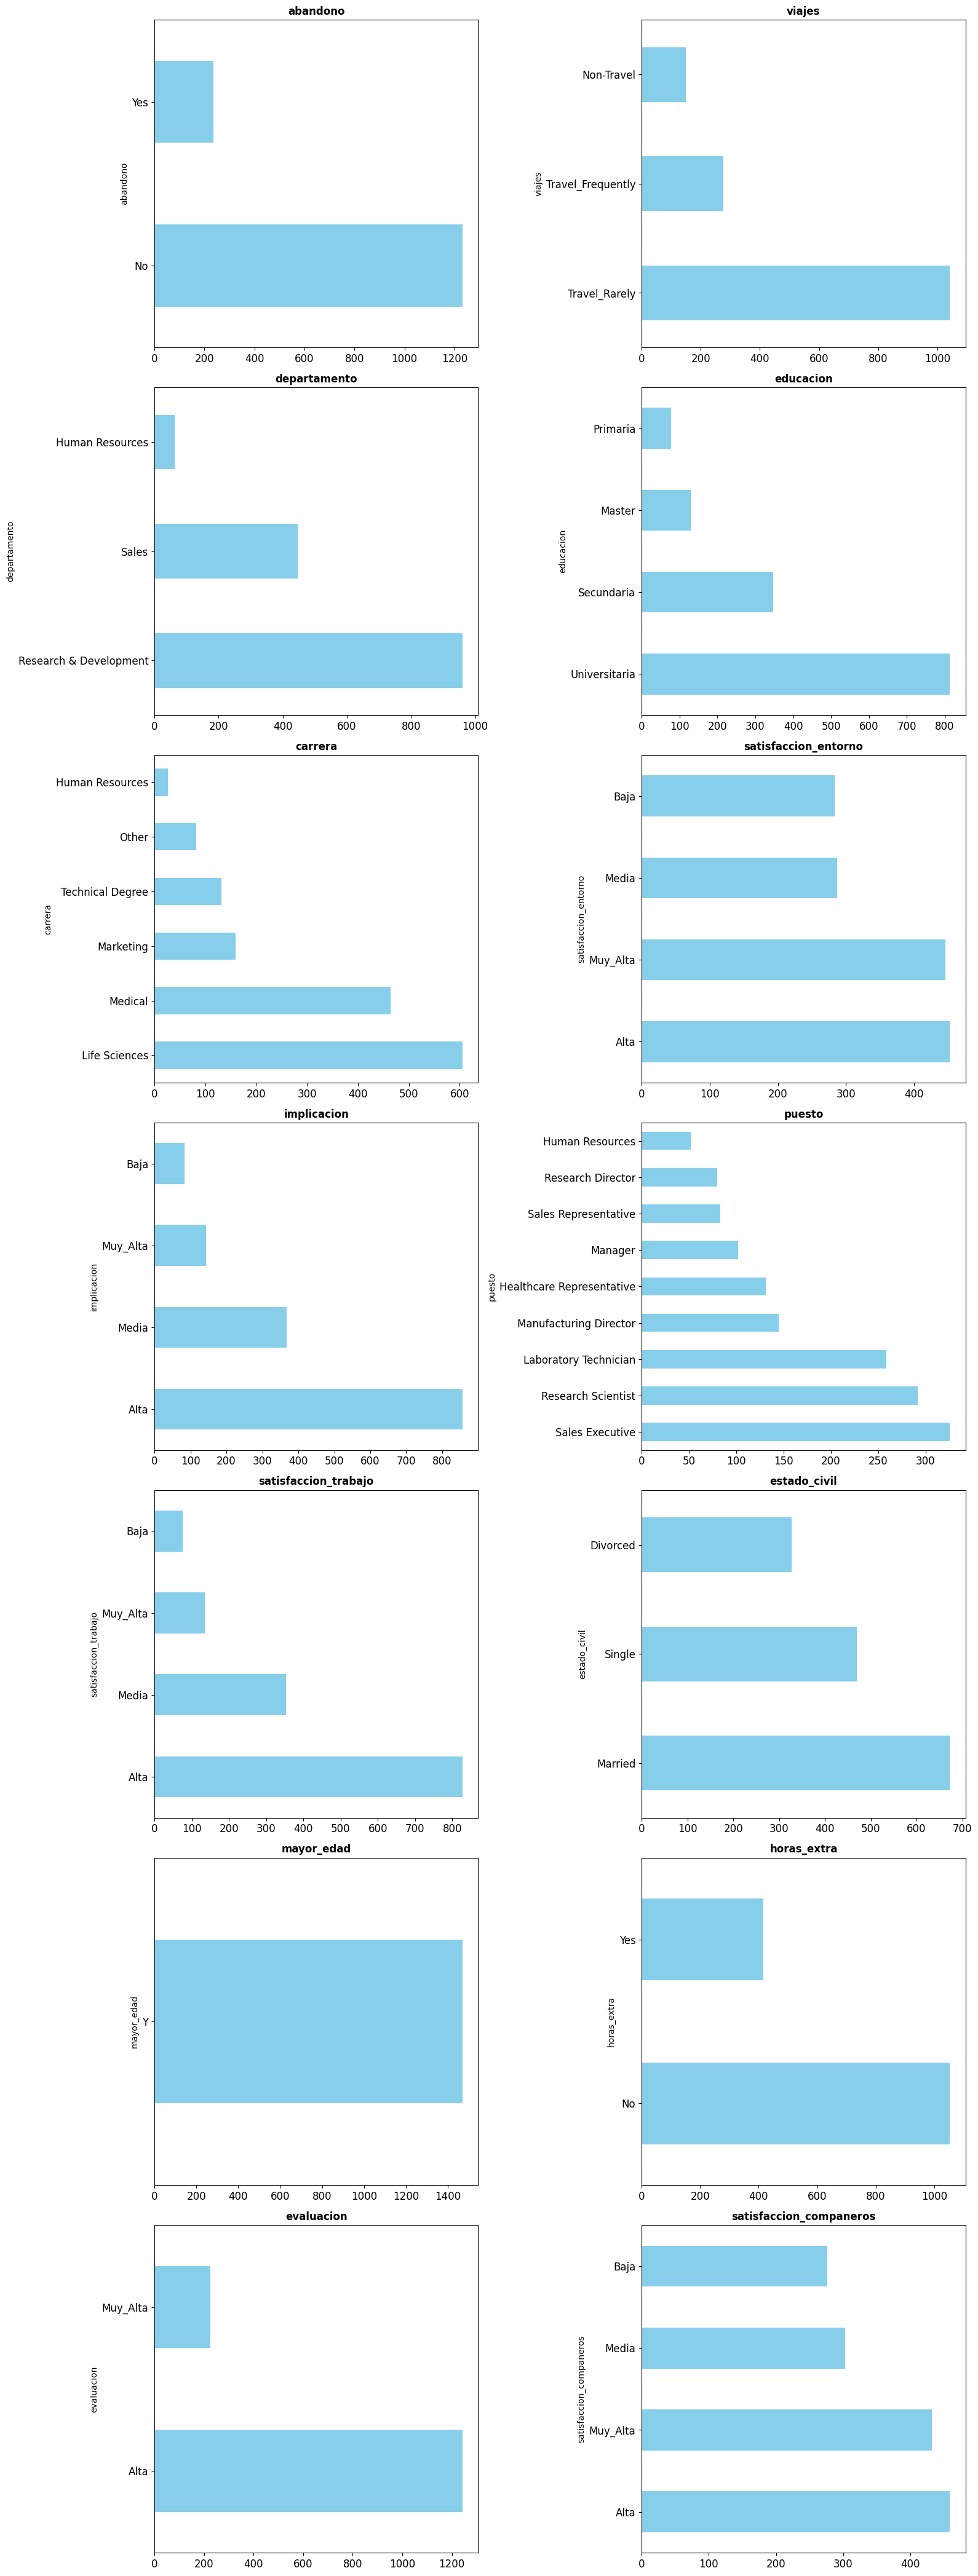

In [8]:
grafico_eda(df.select_dtypes('O'))

__ANALIZANDO LAS GRAFICAS CONOCEMOS LOS DETALLES DE CADA VARIABLE__

tras obtener las graficas y analizando las graficas llege a la conclusion de:<br>
* eliminar "mayor_edad" debido a que solo tiene un valor constante 
* imputar las variables :
    * educacion por universitaria<br>
    * satisfaccion_trabajo por  alta<br>
    * implicacion por alta<br>


__¿por que llegue a ese resultado?__ 

* por que al analizar las variables vemos que __mayor_edad__ solo tiene un valor el cual es constante y no aportaria nada al sistema.

* en la variable __educacion__ utilizamos universitaria debido a que minimizaremos los errores es imputando con el valor mas alto de la variable y pasaria lo mismo con __satisfaccion y implicacion__ 

In [9]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')
                     #.fillna -> se utiliza para rellenar los valores faltantes
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

__¿como llegue a este resultado?__

1.- creando una funcion donde me muestre graficamente las variables categoricas todas a la ves. <br>
2.- analizando las graficas para encontar irregularidades en los valores y tomar una desciion. <br>
3.- creo conclusiones. <br>
4.- correcciones. 

# EDA NUMERICAS

__CREAMOS UNA FUNCION PARA LAS VARIABLES NUMERICAS CON UNA REPRESENTACION ESTADISTICA__ 

In [10]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Lo cual puede eliminarse
* Sexo tiene 4 valores --> Igual la eliminamos 
* Horas quincena solo tiene una valor --> Eliminarla


In [12]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df #mostrtamos el nuevo dataset con los datos limpios.

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


---
<br/><br/>

# GENERACIÓN DE INSIGHTS

Generare un par de preguntas base para poder inicar el modelo.

 __Cuantificación del problema: ¿Cual es la tasa de abandono?__

In [13]:
df.abandono.value_counts(normalize = True) * 100
# Cuenta los valores únicos en la columna 'abandono', devuelve la proporción de cada valor
# y multiplica por 100 para obtener el porcentaje.

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [14]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

__¿Hay un perfil tipo de empleado que deja la empresa?__

<Axes: xlabel='educacion'>

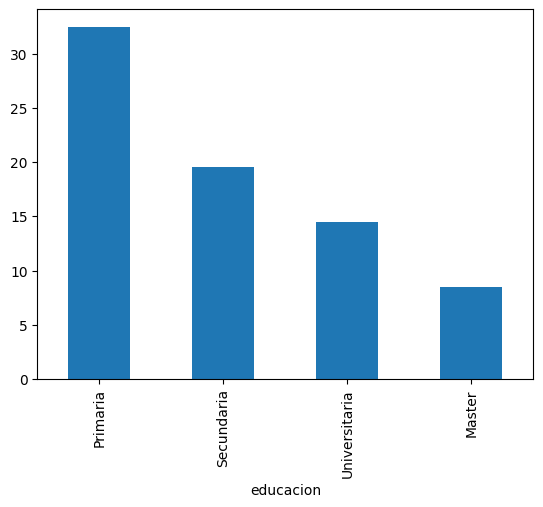

In [15]:
# Analisis por educación
# Agrupa el DataFrame 'df' por la columna 'educacion', calculando la media de la columna 'abandono' para cada grupo.
# Esto calcula el porcentaje promedio de abandono debido a que antiormente el no lo convertimos a 0 y si a 1 
# para cada nivel de educación.
temp = df.groupby('educacion').abandono.mean().sort_values(ascending=False) * 100

# Ordena los valores resultantes de mayor a menor (ascending=False),
#  y luego multiplica por 100 para obtener el porcentaje.

# Genera un gráfico de barras utilizando los datos almacenados en 'temp', 
# donde los índices son los niveles de educación y los valores son los porcentajes
#  de abandono.
temp.plot.bar()


las personas que tienen un master es menos probable a que abandone la empresa que las personas que solo tienen la primaria

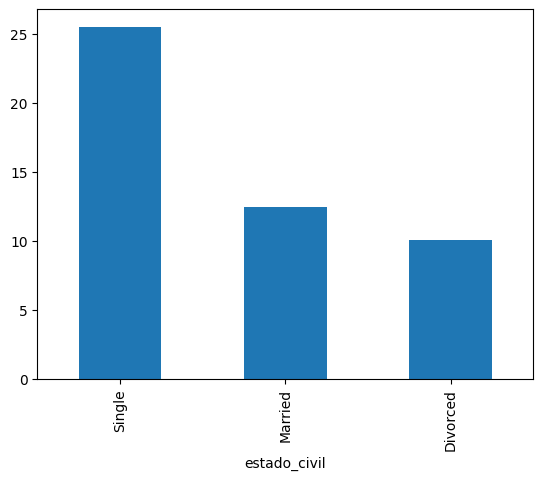

In [16]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

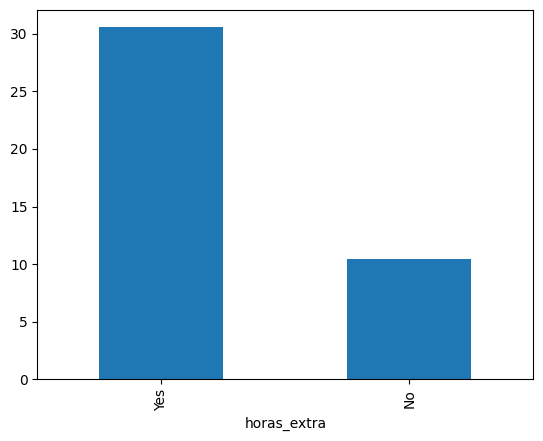

In [17]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();


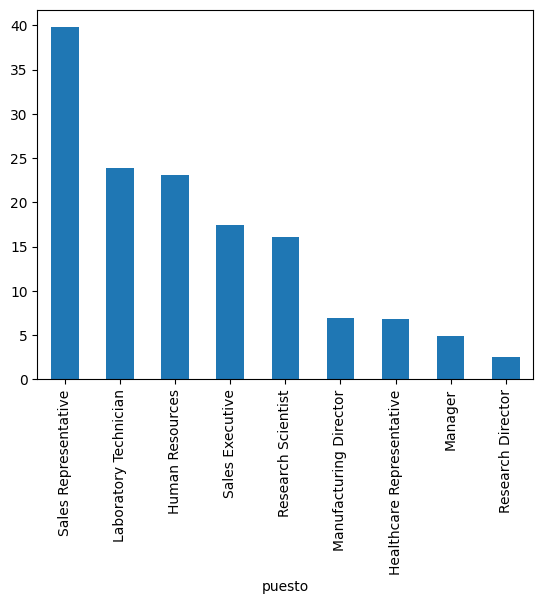

In [18]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

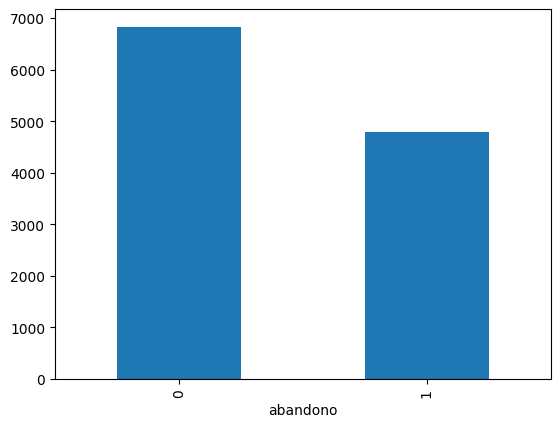

In [19]:
#agrupamos por si el empleado se ha ido o no se ha salido con la media del salario 
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

los empleados que tienen sueldos mas bajos son los que tienden a irse mas que los ue tienen un salario alto 

__CONCLUSIONES__
El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

#  Estimacion del impacto economico (caso de negocio)

explicacion a puestos de direccion

__¿Cual es el impacto económico de este problema?__

Según el estudio "Cost of Turnover" del Center for American Progress:(datos externos)

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [20]:
# Creamos una nueva variable salario_ano del empleado 
#muliplicamos el salario mensual por el anual
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [21]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones cuanto nos costaria el emleado si se fuera
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


tomando de ejeplo el numero 1 si el empleado se fuera tendria un coste de 14670 

---
<br/><br/>

__¿Cúanto nos ha costado este problema en el último año?__

In [22]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

---
<br/><br/>

__¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)__

In [23]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

np.float64(368672.688)

---
<br/><br/>


__¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?__

In [24]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

__Y podemos seguir trazando estrategias asociadas a los insights de abandono:__

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [25]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

__Ahora vamos a estimar cuántos se nos irán este año__

In [26]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [27]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

# MACHING LEARNING

__PREPARAR DATOS PARA LA MODELALIZACION__

In [28]:
df_ml = df.copy()
# hacemos una copia por que trabajaremos con la copia 

In [29]:
df_ml.info() #revisamos que no existan nulos

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

__ohe.get_feature_names_out(input_features=cat.columns)__
 obtiene los nombres de las nuevas columnas generadas por la codificación One-Hot, que se basan en los valores únicos de las variables categóricas.

In [30]:
# Importar la clase OneHotEncoder desde la biblioteca sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
# para trabajr con esta libreria no debe haber nulos y todo debe ser dato numerico

In [37]:
#Categóricas
# Seleccionar las columnas categóricas (de tipo objeto) del DataFrame df_ml
cat = df_ml.select_dtypes('O')

#Instanciamos
# Crear una instancia del codificador OneHotEncoder
# sparse=False indica que queremos la salida en formato denso (no una matriz dispersa)
ohe = OneHotEncoder(sparse_output=False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
# Aplicar la codificación One-Hot a los datos categóricos
# Esto transforma las variables categóricas en una representación binaria
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
# Convertir el resultado codificado en un DataFrame de pandas
# Obtener los nombres de las nuevas columnas generadas por la codificación One-Hot
# Los nombres de las columnas están basados en los valores únicos de las variables categóricas originales
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [38]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


__dataframe final__
* juntaremos las variables categoricas transformadas en numericas con el resto de las variables numericas para que esten todas juntas  

In [39]:
#Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe
num = df.select_dtypes('number').reset_index(drop = True)

__juntamos los ficehros__

In [40]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml #obtendremos el dataframe definitivo con todas las variables en tipo numerico

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


# Diseño de la modelizacion

__separacion predictorias y traget__

las variables predictoras lass marcaremos como __x__

In [41]:
x = df_ml.drop(columns='abandono') #eliminara las columnas excepto abandono
y = df_ml['abandono'] #target solo nos quedamos con abandono de las otras 

separacion entre train y test

In [42]:
from sklearn.model_selection import train_test_split
                                     # separa de manera aleatoria el 70% y un 30%

In [43]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)  #70/30 ponemos 0.3 si hacemos 80/20 0.2
 #devuelve 2 objetos las predictoras de entrenamiento y la target del conjunto de entrenamiento

__entrenamiento del modelo sobre train__

In [44]:
from sklearn.tree import DecisionTreeClassifier #llamamos esta parte de la libreria

In [45]:
#Instanciar
ac = DecisionTreeClassifier(max_depth=4) #tiene 4 niveles maximos

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

__PREDICCIÓN Y VALIDACIÓN SOBRE TEST__

In [46]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
#selelcionaremos los datos guardados en est x y que ssolo me interesa la probabbilidad que el empleado deje la empresa osea 1
pred[:20]  #solo veres 2o predicciones de los primeros 20 empelados

array([0.05242718, 0.05242718, 0.18867925, 0.05242718, 0.05242718,
       0.05242718, 0.18867925, 0.08      , 0.05242718, 0.05242718,
       0.6875    , 0.35897436, 0.6875    , 0.05242718, 0.05242718,
       0.05242718, 0.10344828, 0.05242718, 0.05242718, 0.05242718])

In [47]:
# Evaluación
from sklearn.metrics import roc_auc_score # metrica utilizada para devolver un numero si esta bajo de 0.7 el modelo no es muy bueno 
# y superiores el modelo es bueno y practico y 1 es muy bueno

roc_auc_score(test_y,pred)
#testy es la taregt para validar con los pasados y la prediccion 

np.float64(0.7159497525694708)

conclusion:
importo calse del modelo a utilizar 
definimos con los parametros (instanciar)
entreno(fit)
predicciones(predictproba)
validamos con (roc_auc)

__Diagrama de Arbol__

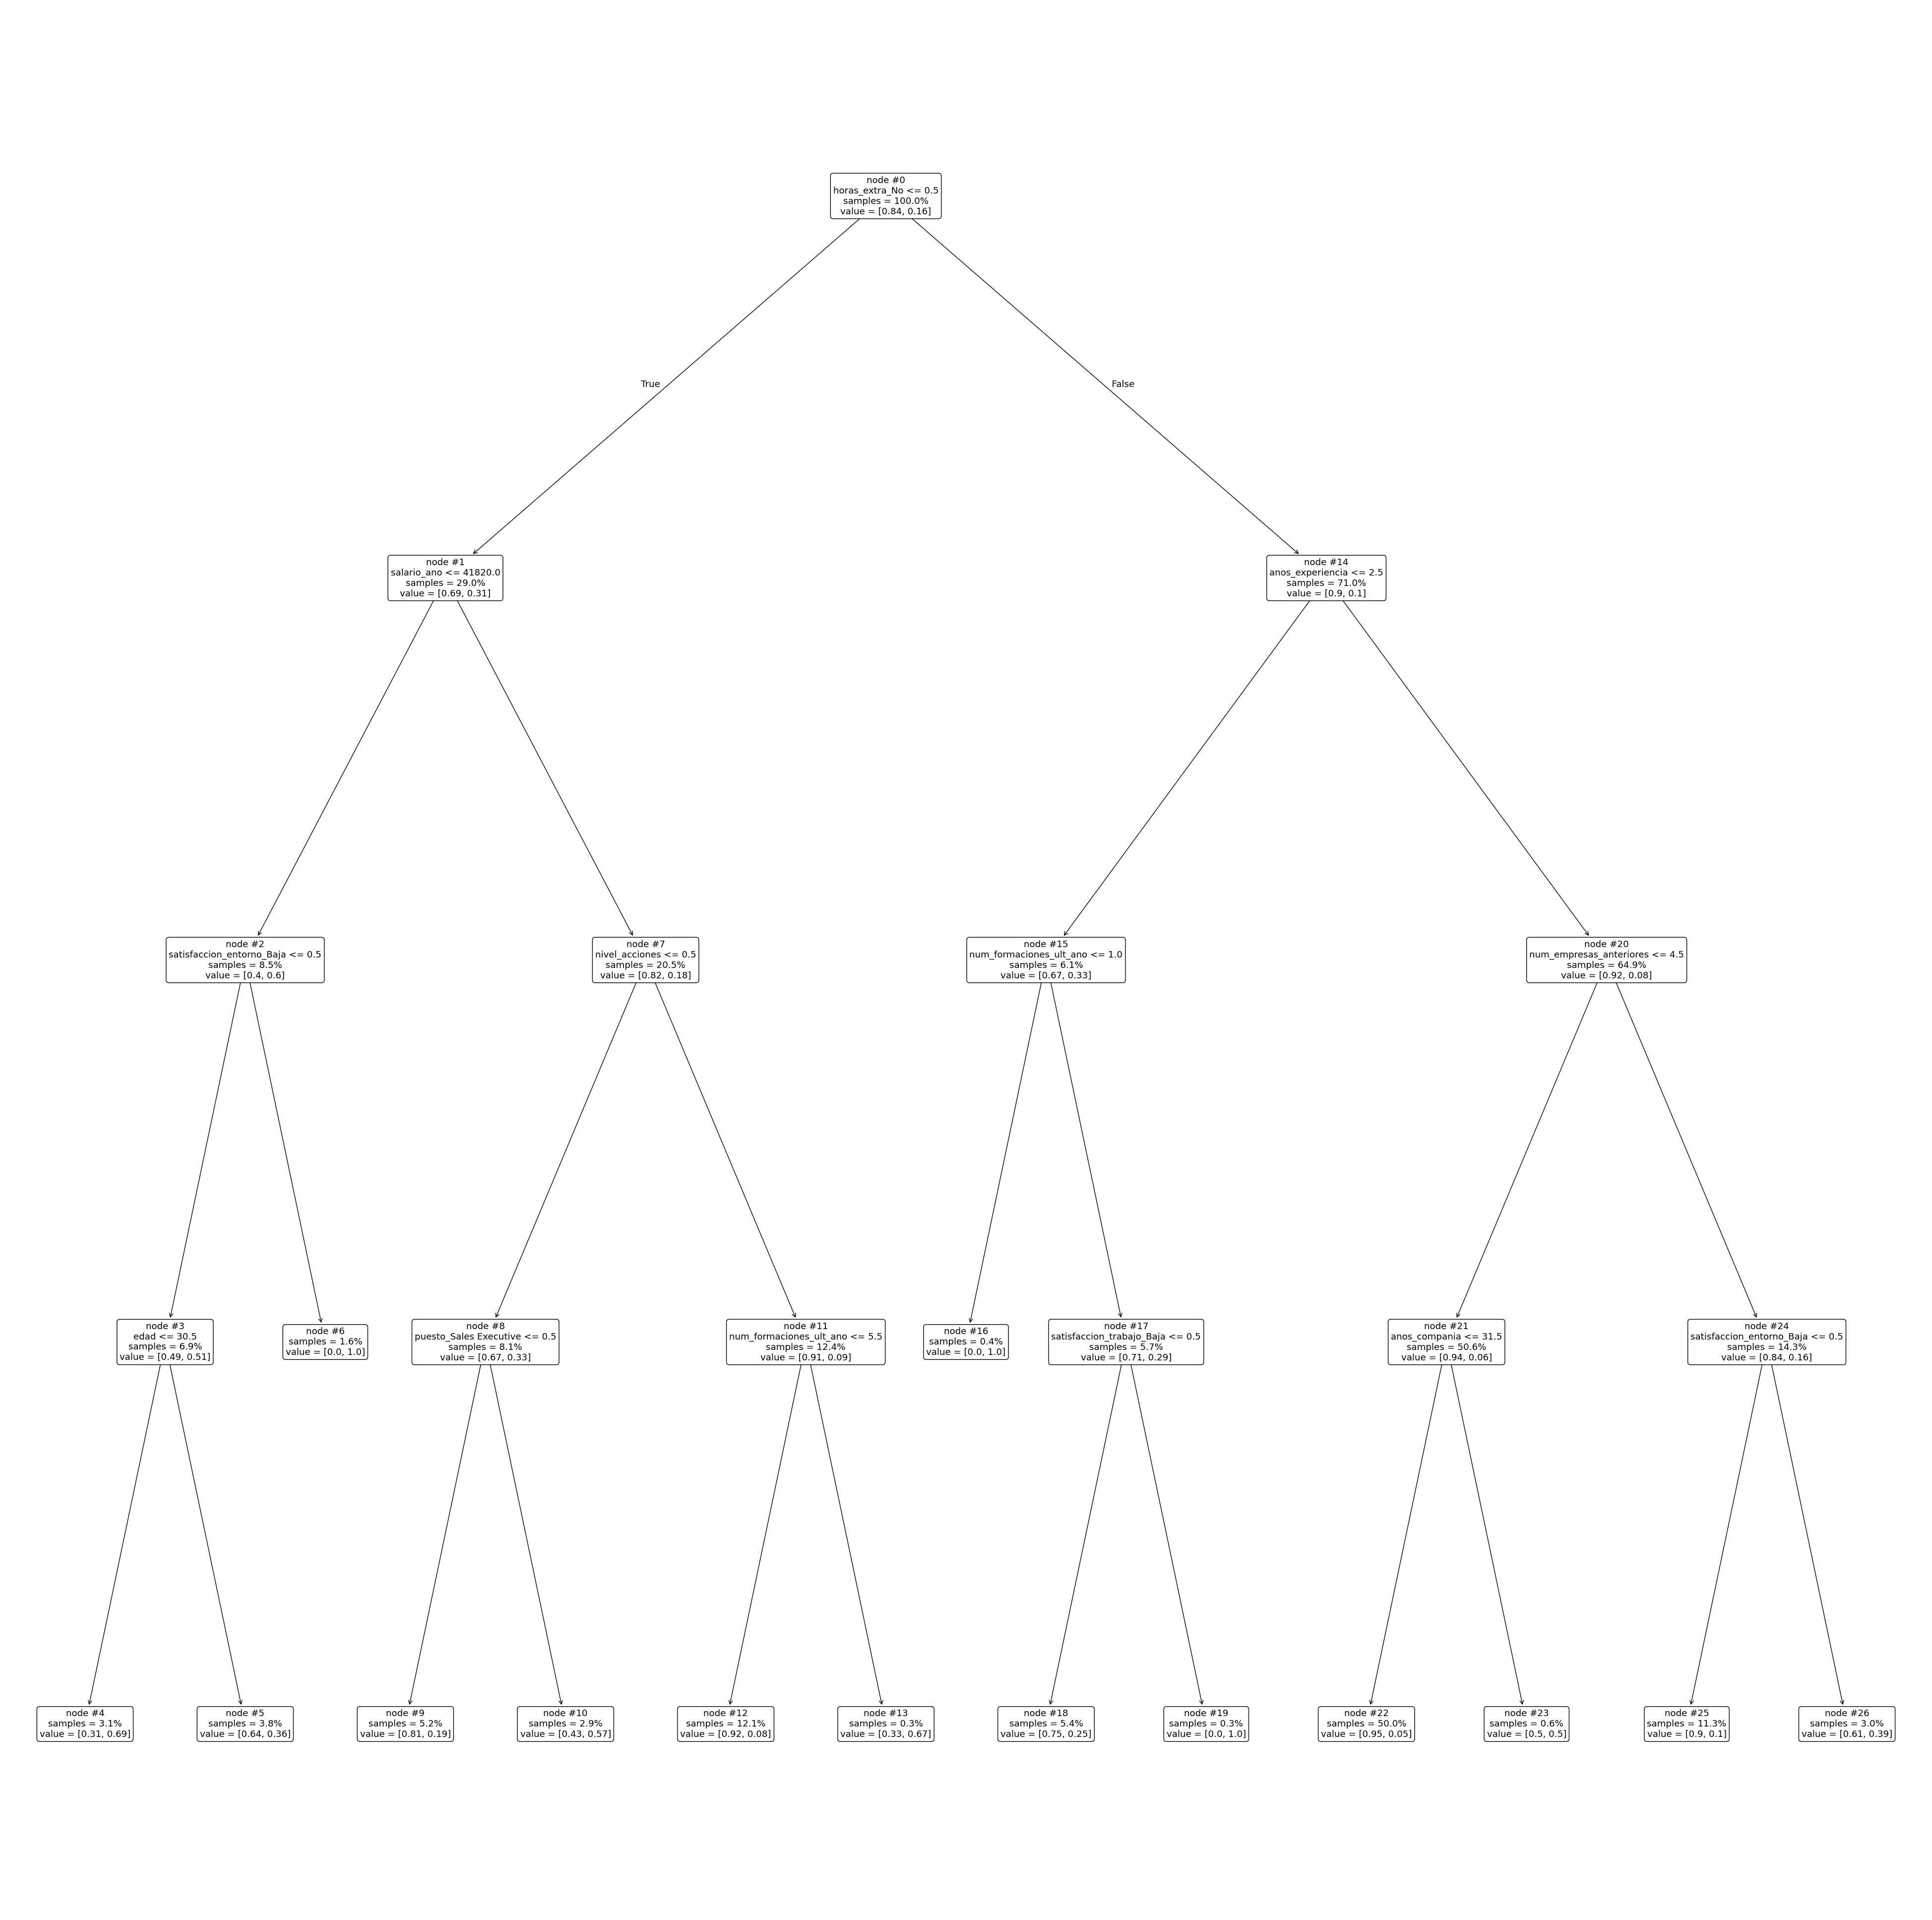

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50)) #definimos tamaño de imagen

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2); #obcines para el grafico

Estos arboles de inicia por el nodo inicial para leerlo "samples=100" es el conjunto de validacion esta completo en este arbol. junto con la validacion de cuantos ya han salido del values(0 y 1) porcentaje de avandono  0 es no 1 es si  y sale la razon. 

__Importancia de las variables__

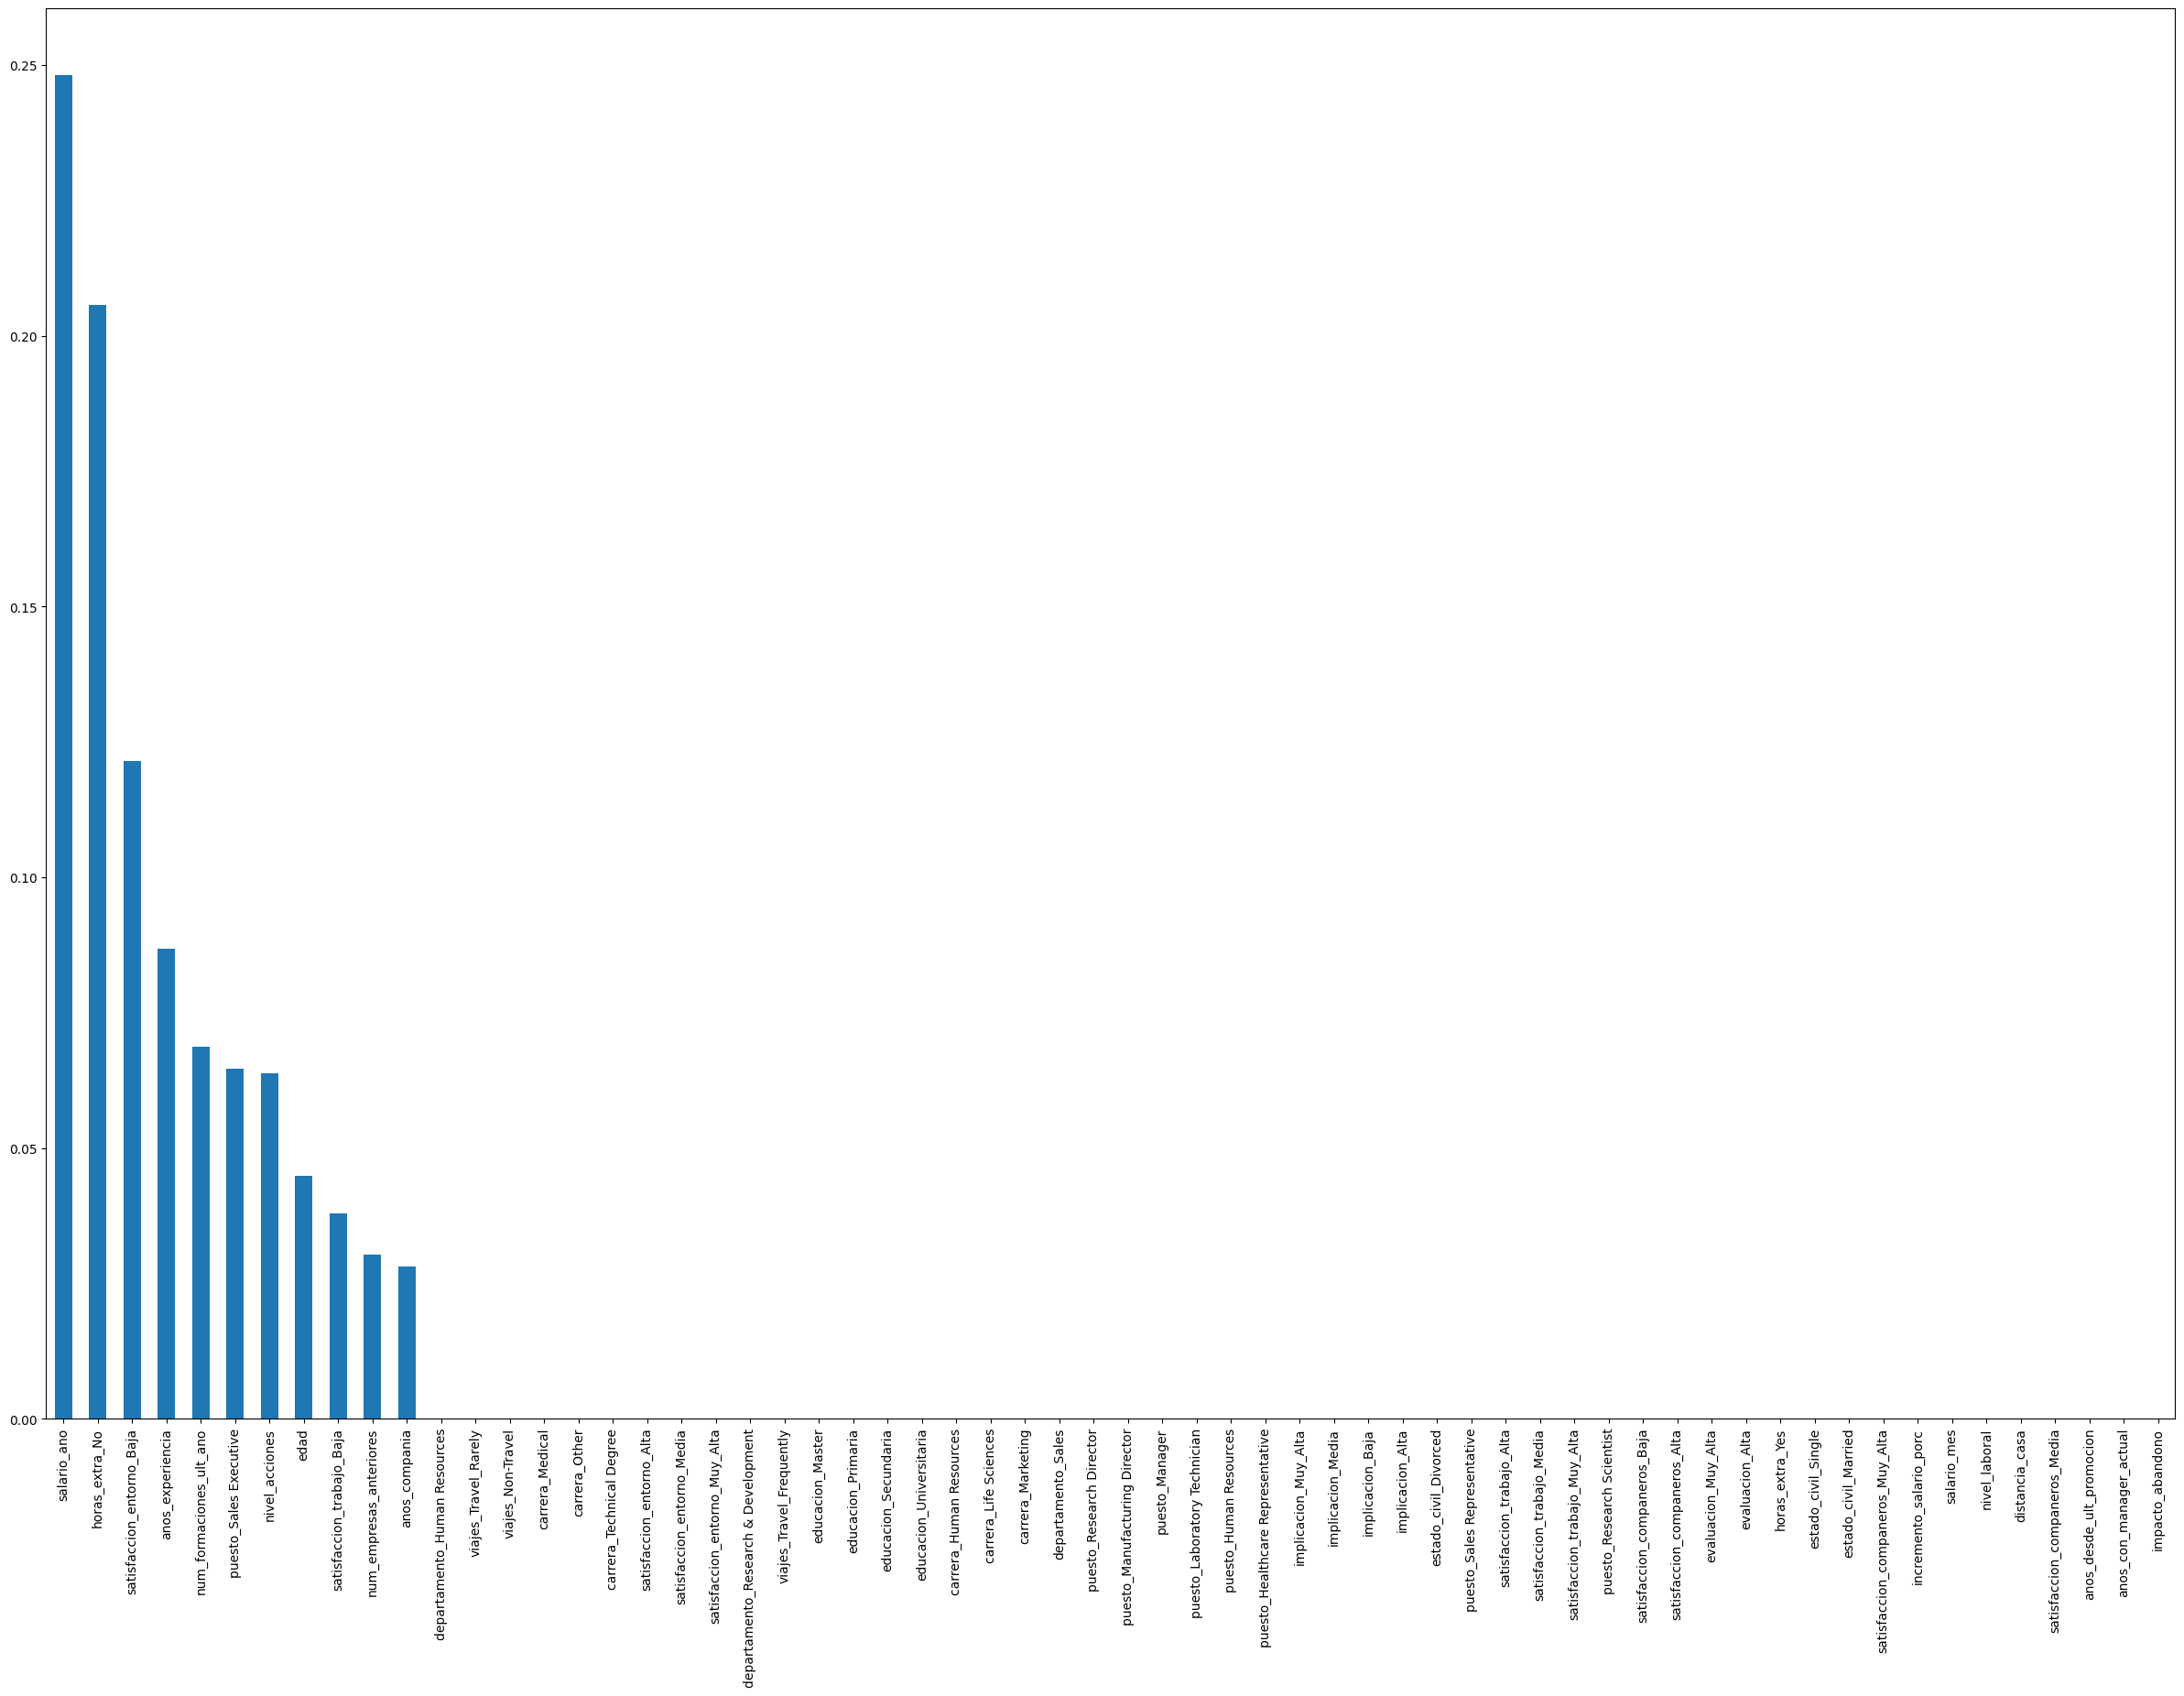

In [49]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

__EXPLOTACION__

AGREGAGMOS EL DATASET TOTAL EL DEL INICIO Y CONTRUIMOS UNA NUEVA VARIABLE CON EL SCRORING DE AVANDONO 

In [50]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df 

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.566667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.052427
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.358974
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.358974
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.387097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.052427
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.052427
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.080000


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [52]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
21,32,0,Travel_Rarely,Research & Development,5,Master,Life Sciences,Baja,Muy_Alta,1,...,Muy_Alta,2,7,5,6,0,5,39576,7796.472,1.0
47,50,1,Travel_Rarely,Sales,3,Secundaria,Marketing,Baja,Media,1,...,Alta,0,3,2,3,0,2,32196,6342.612,1.0
55,26,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.0
1939,32,1,Travel_Frequently,Research & Development,5,Master,Life Sciences,Baja,Muy_Alta,1,...,Baja,0,8,2,4,0,3,29184,4698.624,1.0
1714,24,1,Travel_Rarely,Human Resources,22,Primaria,Human Resources,Muy_Alta,Baja,1,...,Alta,1,1,2,1,0,0,18660,3004.260,1.0
1752,29,1,Travel_Rarely,Sales,9,Primaria,Marketing,Media,Baja,1,...,Alta,0,2,3,2,2,2,33120,6524.640,1.0
1844,29,1,Travel_Rarely,Human Resources,13,Secundaria,Human Resources,Baja,Media,1,...,Muy_Alta,3,4,3,2,2,0,28020,4511.220,1.0
1649,40,1,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,Baja,Alta,1,...,Media,0,10,3,4,0,3,25992,4184.712,1.0
1467,34,1,Travel_Rarely,Human Resources,9,Universitaria,Technical Degree,Baja,Alta,1,...,Muy_Alta,0,2,0,2,2,2,32904,6482.088,1.0


Ejemplo: riesgo de dejar la empresa por puesto de trabajo (analisis estrategicos)

este puede dividrse en varios ejemplos como manajer para ver quienes son mas eficientes con sus encargados o por oficina o cualquier variable de interes

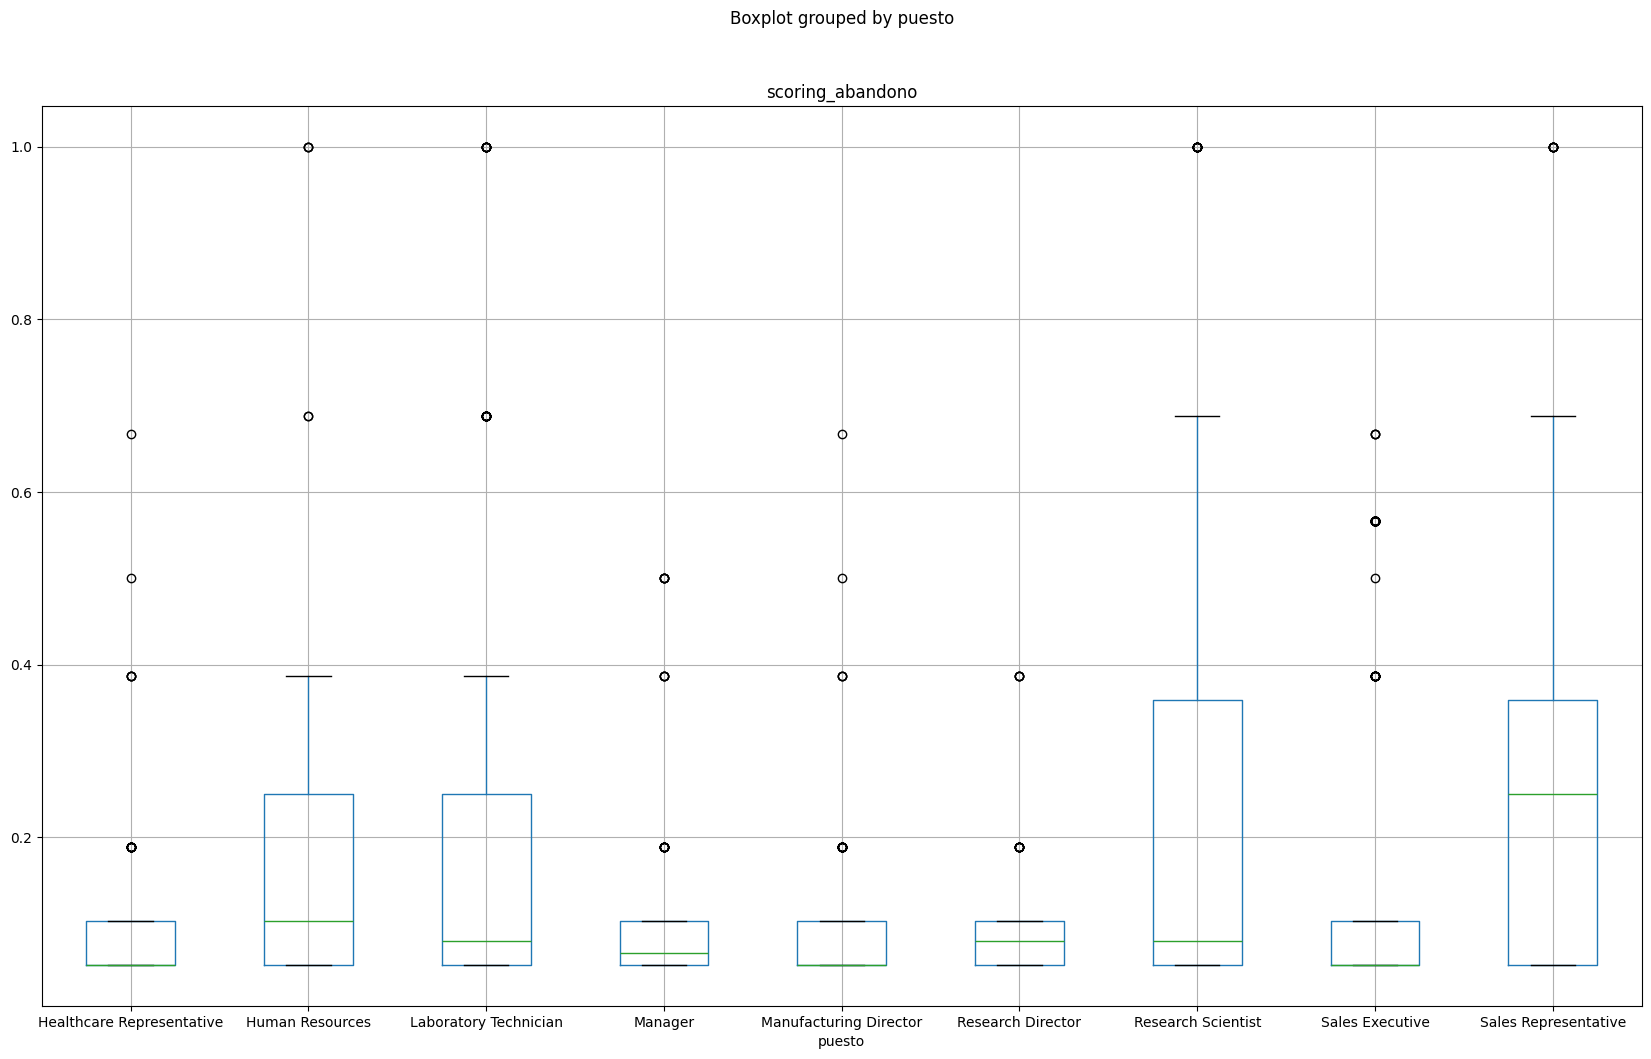

In [53]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

__GUARDAR EL RESULTADO__ 


In [54]:
df # 

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.566667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.052427
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.358974
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.358974
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.387097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.052427
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.052427
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.080000


guadaremos el documento en un documento nuevo de excel

In [58]:

# Guardar DataFrame como archivo Excel
df.to_excel('abandono_con_scoring.xlsx', index=False)


# apartir de aqui trabjaremos con tablau 

__https://public.tableau.com/views/DasboardFugaDeEmpleados/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link__